In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\Classification\placement-dataset.csv")

In [3]:
df.head(2)

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0


In [4]:
df.drop(columns='city', axis=1, inplace=True)

In [5]:
df.head(2)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0


In [6]:
df.isnull().sum().sum()

np.int64(12)

In [7]:
df['cgpa'].fillna(df['cgpa'].mean(), inplace=True)
df['iq'].fillna(df['iq'].mean(), inplace=True)

In [8]:
df.isnull().sum().sum()

np.int64(0)

## Divide dataset into 2 parts

In [9]:
x = df.iloc[:, :-1]
y = df['placement']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardization [Plotting]

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_scaled = ss.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [12]:
print(x.head(1))
print(x_scaled.head(1))

   cgpa     iq
0   6.8  123.0
       cgpa       iq
0  0.751207  0.11117


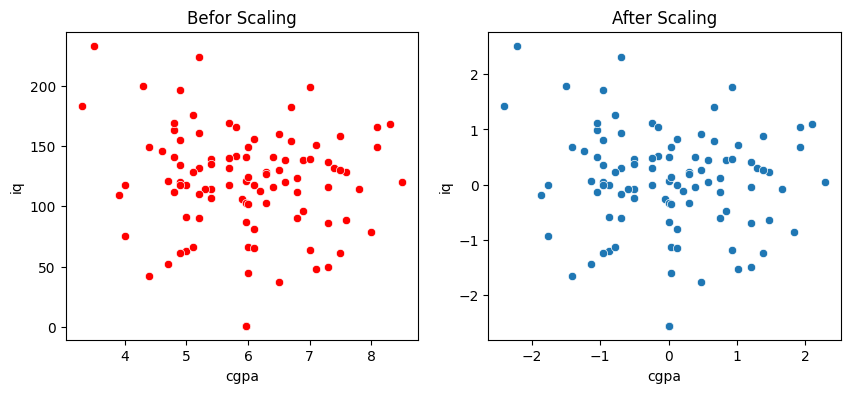

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(data=x, x='cgpa', y='iq', c='red')
plt.title("Befor Scaling")

plt.subplot(1,2,2)
sns.scatterplot(data=x_scaled, x='cgpa', y='iq')
plt.title("After Scaling")
plt.show()

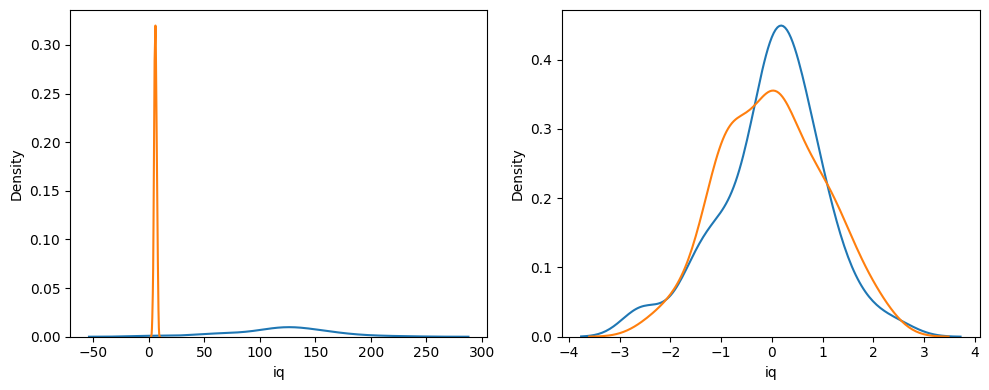

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(data=x, x='iq', legend=False)
sns.kdeplot(data=x, x='cgpa', legend=False)

plt.subplot(1,2,2)
sns.kdeplot(data=x_scaled, x='iq', legend=False)
sns.kdeplot(data=x_scaled, x='cgpa', legend=False)

plt.tight_layout()
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(x_train, y_train)
lr_scaled.fit(x_train, y_train)

LogisticRegression()